The case study is from a dataset from Kaggle. 
Link to the Kaggle project site: https://www.kaggle.com/c/plant-seedlings-classification/data

Can you differentiate a weed from a crop seedling? The ability to do so effectively can mean better crop yields and better stewardship of the environment.

#### 1. Read the images and generate the train and test dataset (10 points)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
%cd 'drive'
!ls

/content/drive
'My Drive'


In [5]:
%cd 'My Drive/Colab Notebooks/GreatLearning'
!ls

/content/drive/My Drive/Colab Notebooks/GreatLearning
plant_seeding_train.zip


In [6]:
import zipfile as zf

trainZip = zf.ZipFile('plant_seeding_train.zip')
trainZip.extractall()

plant_seeding_train.zip  train


In [7]:
!ls train

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


#### 2.Divide the data set into Train and validation data sets

In [0]:
import os
import glob
import cv2

trainFolder = "train";
images = []
classes = []

for folderName in os.listdir(trainFolder):
  classLabel = folderName
  folderPath = os.path.join(trainFolder, folderName)
  for filename in os.listdir(folderPath):
    fullFilePath = os.path.join(folderPath, filename)
    img = cv2.imread(fullFilePath)
    if img is not None: 
      images.append(img)
      classes.append(classLabel)

In [0]:
import numpy as np

imageResize = []
for img in images:
  img = np.array(img).astype(np.uint8)
  imageResize.append(cv2.resize(img, (256,256), interpolation = cv2.INTER_CUBIC))

In [0]:
imagesFinal = np.array(imageResize)
classesFinal = np.array(classes)

In [13]:
print(imagesFinal.shape)
print(classesFinal.shape)

(4750, 256, 256, 3)
(4750,)


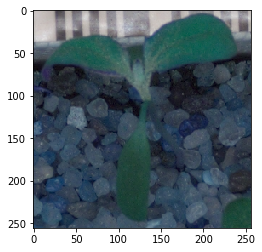

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(imagesFinal[10])
plt.show()

In [0]:
from sklearn.preprocessing import LabelBinarizer

binarizer = LabelBinarizer()
Y = binarizer.fit_transform(classesFinal)

In [0]:
from sklearn.model_selection import train_test_split

X = imagesFinal
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### 3.Initialize & build the model (20 points)

In [0]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', patience=3, verbose=1, mode='auto')

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPool2D, BatchNormalization

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(256, 256, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(12, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization_57 (Batc (None, 254, 254, 32)      128       
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 252, 252, 32)      9248      
_________________________________________________________________
batch_normalization_58 (Batc (None, 252, 252, 32)      128       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 124, 124, 64)     

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=20, epochs=30, validation_data=(x_test, y_test), callbacks=[es])

Train on 3800 samples, validate on 950 samples
Epoch 1/30
3800/3800 [==============================] - 71s 19ms/step - loss: 1.9018 - acc: 0.4108 - val_loss: 2.0557 - val_acc: 0.3747
Epoch 2/30
3800/3800 [==============================] - 65s 17ms/step - loss: 1.0618 - acc: 0.6574 - val_loss: 1.4308 - val_acc: 0.5568
Epoch 3/30
3800/3800 [==============================] - 65s 17ms/step - loss: 0.6753 - acc: 0.7782 - val_loss: 0.6899 - val_acc: 0.7621
Epoch 4/30
3800/3800 [==============================] - 65s 17ms/step - loss: 0.4589 - acc: 0.8539 - val_loss: 0.7384 - val_acc: 0.7895
Epoch 5/30
3800/3800 [==============================] - 65s 17ms/step - loss: 0.3633 - acc: 0.8845 - val_loss: 0.6735 - val_acc: 0.7905
Epoch 6/30
3800/3800 [==============================] - 65s 17ms/step - loss: 0.2853 - acc: 0.9147 - val_loss: 0.7191 - val_acc: 0.7926
Epoch 7/30
3800/3800 [==============================] - 65s 17ms/step - loss: 0.2072 - acc: 0.9350 - val_loss: 0.7717 - val_acc: 0.7874
E

In [36]:
model.evaluate(x_test, y_test)

950/950 [==============================] - 7s 7ms/step


[0.7905388801976254, 0.7736842102753488]

#### 4.Optimize the model (16 points)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rotation_range = 180, zoom_range = 0.1, width_shift_range = 0.1,
                               height_shift_range = 0.1, horizontal_flip = True, vertical_flip = True)
generator.fit(x_train)

In [39]:
model.fit_generator(generator.flow(x_train, y_train, batch_size=32), steps_per_epoch=len(x_train)//32, 
                    epochs=30, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/30
118/118 [==============================] - 61s 515ms/step - loss: 0.3951 - acc: 0.8641 - val_loss: 1.5001 - val_acc: 0.6695
Epoch 2/30
118/118 [==============================] - 59s 500ms/step - loss: 0.4045 - acc: 0.8575 - val_loss: 0.3268 - val_acc: 0.8979
Epoch 3/30
118/118 [==============================] - 59s 499ms/step - loss: 0.3788 - acc: 0.8684 - val_loss: 2.4720 - val_acc: 0.4874
Epoch 4/30
118/118 [==============================] - 59s 498ms/step - loss: 0.3488 - acc: 0.8789 - val_loss: 0.3322 - val_acc: 0.8916
Epoch 5/30
118/118 [==============================] - 59s 500ms/step - loss: 0.3351 - acc: 0.8882 - val_loss: 0.4283 - val_acc: 0.8568
Epoch 00005: early stopping


In [40]:
model.evaluate(x_test, y_test)

950/950 [==============================] - 5s 6ms/step


[0.42834846985967534, 0.856842104761224]

#### 5.Predict the accuracy for both train and validation data (14 points)

In [42]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(y_test, axis = 1) 

#Print confusion matrix
cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

[[ 35   0   0   0   1   3  23   0   0   0   0   0]
 [  0  72   0   0   0   2   0   0   0   0   0   0]
 [  0   0  44   0   0   9   1   0   0   0   0   0]
 [  0   1   1 110   0   1   0   2   0   7   0   0]
 [  9   0   0   0  19  10   1   0   0   0   0   1]
 [  0   0   0   0   0  92   0   0   0   0   0   0]
 [ 11   0   0   0   0   5 114   0   0   0   0   0]
 [  0   0   0   0   1   0   1  46   0   0   0   0]
 [  1   1   2   1   0   7   2   0  82   8   1   1]
 [  0   0   0   0   0   2   0   0   0  44   0   0]
 [  0   0   0   0   0   6   0   0   1   2  98   0]
 [  0   0   0   0   0   9   0   1   1   0   0  58]]
